In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
dataset_dir = "caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [3]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [4]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [5]:
for layer in base_model.layers:
   layer.trainable = False

In [6]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.1358 - loss: 4.2293 - val_accuracy: 0.2915 - val_loss: 3.3488
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3402 - loss: 3.0672 - val_accuracy: 0.3675 - val_loss: 2.8979
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.4522 - loss: 2.5473 - val_accuracy: 0.4485 - val_loss: 2.5819
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5371 - loss: 2.1152 - val_accuracy: 0.4770 - val_loss: 2.3640
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5677 - loss: 1.8991 - val_accuracy: 0.4930 - val_loss: 2.2172
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6367 - loss: 1.6042 - val_accuracy: 0.5170 - val_loss: 2.0837
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6793 - loss: 1.3712 - val_accuracy: 0.5360 - val_loss: 2.0059
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7530 - loss: 1.2018 - val_accuracy: 0.5570 - val_loss:

In [8]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2600 - loss: 3.6875 - val_accuracy: 0.4170 - val_loss: 2.5788
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5093 - loss: 2.0776 - val_accuracy: 0.5325 - val_loss: 1.9797
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6778 - loss: 1.3258 - val_accuracy: 0.5725 - val_loss: 1.7800
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.7768 - loss: 0.8404 - val_accuracy: 0.6020 - val_loss: 1.6702
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8670 - loss: 0.4957 - val_accuracy: 0.6285 - val_loss: 1.6831
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9193 - loss: 0.3175 - val_accuracy: 0.6215 - val_loss: 1.6803
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9363 - loss: 0.2282 - val_accuracy: 0.6305 - val_loss: 1.6965
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9678 - loss: 0.1210 - val_accuracy: 0.6275 - val_loss:

In [9]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step


In [10]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  Motorbikes


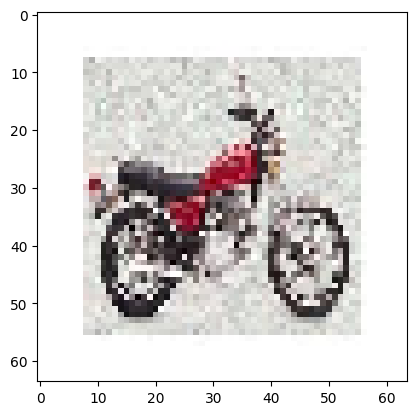

In [28]:
n = 100
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
# print("Actual: ", labels[np.argmax(y_test[n])])